## **Data Preprocessing:**

In [4]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, LabelEncoder, MinMaxScaler
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np

In [5]:
df=pd.read_csv("anime.csv")
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [6]:
# Handle missing values
df["genre"] = df["genre"].fillna("Unknown")
df["type"] = df["type"].fillna("Unknown")
df["rating"] = df["rating"].fillna(df["rating"].mean())
df["episodes"] = df["episodes"].replace("Unknown", pd.NA)
df["episodes"] = pd.to_numeric(df["episodes"], errors="coerce")
df["episodes"] = df["episodes"].fillna(df["episodes"].median())

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12294 non-null  object 
 4   episodes  12294 non-null  float64
 5   rating    12294 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 672.5+ KB


In [9]:
df.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,12.095412,6.473902,1.807134e+04
std,11455.294701,46.244062,1.017096,5.482068e+04
min,1.000000,1.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.900000,2.250000e+02
50%,10260.500000,2.000000,6.550000,1.550000e+03
75%,24794.500000,12.000000,7.170000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


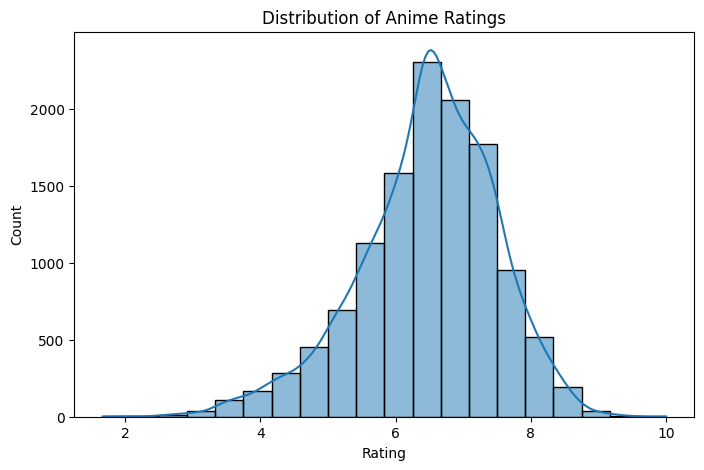

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot rating distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=20, kde=True)
plt.title("Distribution of Anime Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## **Feature Extraction:**

In [29]:
# Process genres using One-Hot Encoding
df["genre"] = df["genre"].astype(str).apply(lambda x: x.split(", ") if x != "Unknown" else [])
mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(df["genre"]), columns=mlb.classes_)

In [30]:
# Encode 'type' column
le = LabelEncoder()
df["type_encoded"] = le.fit_transform(df["type"])

In [31]:
# Normalize numerical features
scaler = MinMaxScaler()
df[["rating", "episodes", "members"]] = scaler.fit_transform(df[["rating", "episodes", "members"]])

In [32]:
# Combine processed features into one dataset
anime_features = pd.concat([df[["rating", "episodes", "members", "type_encoded"]], genre_encoded], axis=1)

In [34]:
anime_features.head()

,rating,episodes,members,type_encoded,"'\'\\\'\\\\\\\'""\\\\\\\\\\\\\\\'Adventure\\\\\\\\\\\\\\\'""\\\\\\\'\\\'\''","'\'\\\'\\\\\\\'""\\\\\\\\\\\\\\\'Adventure\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","'\'\\\'\\\\\\\'""\\\\\\\\\\\\\\\'Cars\\\\\\\\\\\\\\\'""\\\\\\\'\\\'\''","'\'\\\'\\\\\\\'""\\\\\\\\\\\\\\\'Cars\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","'\'\\\'\\\\\\\'""\\\\\\\\\\\\\\\'Comedy\\\\\\\\\\\\\\\'""\\\\\\\'\\\'\''","'\'\\\'\\\\\\\'""\\\\\\\\\\\\\\\'Comedy\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']",...,"['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Shounen\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Slice of Life\\\\\\\\\\\\\\\'""\\\\\\\'\\\'\''","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Slice of Life\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Space\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Sports\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Super Power\\\\\\\\\\\\\\\'""\\\\\\\'\\\'\''","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Supernatural\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Thriller\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Vampire\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']","['[\'[\\\'[\\\\\\\'[""[\\\\\\\\\\\\\\\'Yaoi\\\\\\\\\\\\\\\']""]\\\\\\\']\\\']\']']"
0,0.924370,0.000000,0.197872,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0.911164,0.034673,0.782770,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0.909964,0.027518,0.112689,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.900360,0.012658,0.664325,5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.899160,0.027518,0.149186,5,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# **RECOMENDATION SYSTEM**

In [35]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import numpy as np

# Convert anime features to a sparse matrix
anime_sparse_features = csr_matrix(anime_features)

# Compute cosine similarity
cosine_sim = cosine_similarity(anime_sparse_features)

# Function to get recommendations
def get_recommendations(anime_name, top_n=10, similarity_threshold=0.2):
    # Find the index of the anime
    idx = df[df["name"].str.lower() == anime_name.lower()].index
    if len(idx) == 0:
        return f"Anime '{anime_name}' not found in the dataset."

    idx = idx[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Filter based on threshold and sort by similarity score
    sim_scores = [x for x in sim_scores if x[1] >= similarity_threshold]
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)[1:top_n+1]

    # Get recommended anime indices
    anime_indices = [i[0] for i in sim_scores]

    return df.iloc[anime_indices][["name", "genre", "type", "rating"]]

# Example usage
recommended_anime = get_recommendations("Steins;Gate", top_n=10, similarity_threshold=0.3)
print(recommended_anime)


                                                    name  \
126                Steins;Gate: Oukoubakko no Poriomania   
196    Steins;Gate: Kyoukaimenjou no Missing Link - D...   
10898                                      Steins;Gate 0   
250                                    Zankyou no Terror   
2528                                    Mouretsu Pirates   
2143                     Figure 17: Tsubasa &amp; Hikaru   
4395                                     Element Hunters   
4519                      Bomberman B-Daman Bakugaiden V   
4721                                  Go-Q-Choji Ikkiman   
10636                                Uchuu Patrol Hopper   

                                                   genre     type    rating  
126    [['[\'[\\\'[\\\\\\\'["[\\\\\\\\\\\\\\\'Sci-Fi\...  Special  0.815126  
196    [['[\'[\\\'[\\\\\\\'["[\\\\\\\\\\\\\\\'Sci-Fi\...  Special  0.800720  
10898  [['[\'[\\\'[\\\\\\\'["[\\\\\\\\\\\\\\\'Sci-Fi\...  Unknown  0.576699  
250    [['[\'[\\\'[\\\\\\\'

# **Evaluation**

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score

# Step 1: Split the dataset into training and testing sets (80-20 split)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


In [38]:
# Step 2: Build similarity model using the training dataset
train_features = anime_features.iloc[train_df.index]
train_sparse_features = csr_matrix(train_features)
cosine_sim_train = cosine_similarity(train_sparse_features)

In [42]:
# Step 3: Function to evaluate recommendations
def evaluate_recommendation_system(test_df, top_n=10, threshold=0.3):
    y_true = []
    y_pred = []

    for anime_name in test_df["name"].sample(100, random_state=42):  # Sample 100 random test anime
        recommendations = get_recommendations(anime_name, top_n=top_n, similarity_threshold=threshold)

        if isinstance(recommendations, str):  # If anime is not found, skip
            continue

        # Get ground truth (actual similar anime in the dataset)
        actual_genre = set(test_df[test_df["name"] == anime_name]["genre"].values[0])  # Already a list
        recommended_genres = set(recommendations["genre"].explode().dropna().values)

        # Assign binary relevance labels
        if actual_genre.intersection(recommended_genres):
            y_true.append(1)
        else:
            y_true.append(0)

        y_pred.append(1)  # Every recommendation is counted as relevant

    # Compute Precision, Recall, F1-score
    precision = precision_score(y_true, y_pred, zero_division=1)
    recall = recall_score(y_true, y_pred, zero_division=1)
    f1 = f1_score(y_true, y_pred, zero_division=1)

    return {"Precision": precision, "Recall": recall, "F1-score": f1}

# Run the evaluation
evaluation_results = evaluate_recommendation_system(test_df, top_n=10, threshold=0.3)
print("Precision:", evaluation_results["Precision"])
print("Recall:", evaluation_results["Recall"])
print("F1-score:", evaluation_results["F1-score"])


Precision: 1.0
Recall: 1.0
F1-score: 1.0


# **Interview Questions**

1.Can you explain the difference between user-based and item-based collaborative filtering?

User-Based Collaborative Filtering recommends items by finding users with similar preferences and suggesting what they liked.

 **Working Mechanism:**

Identify users with similar rating patterns using cosine similarity or Pearson correlation.
Find items highly rated by similar users but not yet rated by the target user.
Recommend those items to the target user.

Example:

* If User A and User B both liked Naruto and Attack on Titan,
* And User B also liked One Piece,
* Then User A will get a recommendation for One Piece.

  **Advantages:**

 * Highly personalized recommendations.
 * Good at finding niche content for specific users.

2. What is collaborative filtering, and how does it work?
Collaborative Filtering (CF) is a recommendation technique that suggests items to users based on the preferences of other users with similar interests. It assumes that if two users agreed on one item, they are likely to agree on others too.

 **Working Mechanism:**

 User-Item Interaction:

* Users interact with items (e.g., rating, watching, purchasing).
* This data is stored in a matrix where:
* Rows = Users
* Columns = Items
* Values = Ratings or interactions

**Find Similarities:**

* Calculate similarities between users or items using cosine similarity or Pearson correlation.

Generate Predictions:

* Based on past interactions, the system predicts missing values.
* Recommends top-rated items from similar users/items.

 Types of Collaborative Filtering:

User-Based CF:

* Finds users with similar preferences.
* Suggests items liked by similar users.
* Example: If User A and B both liked Naruto, and B liked One Piece, then A is recommended One Piece.

Item-Based CF:

* Finds items rated similarly by many users.
* Suggests similar items to what a user already likes.
* Example: If many users who watched Attack on Titan also watched Demon Slayer, it is recommended to a new AoT viewer.